### MODELS IMPLEMENTED - RANDOM FOREST

### DATA PREPARATION

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/bank_cleaned_data.csv')
df_rf = df.copy()

In [10]:
drop_cols = ['duration', 'pdays', 'contact', 'month', 'day_of_week']
df = df.drop(columns=drop_cols)

In [11]:
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [12]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['job', 'marital', 'education', 'poutcome']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop('y', axis=1)
y = df['y']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=99)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [16]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8883114010837112

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8036
           1       0.50      0.18      0.26      1007

    accuracy                           0.89      9043
   macro avg       0.70      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [18]:
train_combined = pd.concat([X_train, y_train], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)

df.to_csv('/content/bank_cleaned_data_rf.csv', index=False)
train_combined.to_csv('/content/train_rf.csv', index=False)
test_combined.to_csv('/content/test_rf.csv', index=False)

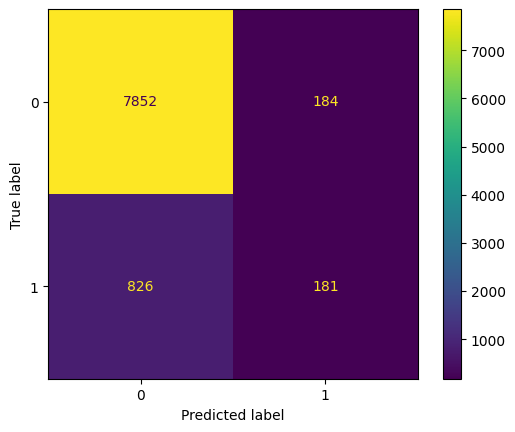

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()